Goal: We are an electricity supplier, and it is currently 11 a.m. on 03/21/2023[hypthetical day]. We would like to participate in the day-ahead market auction at 12 p.m. to purchase 1 MW of electricity for each hour of the day on 03/22/2023[tomorrow]. We will, therefore, place a bid for 1 MW at a certain price for the entire 24 hours of 03/22/2023. We would like to place bids based on our forecasts of the 24 auction prices today, using our model.
Our model takes into account the intraday market exchanges for deliveries from 00:00-01:00... 23:00-midnight for the day of 03/21/2023[hypthetical day]. There have been intraday exchanges for the day of 03/21/2023[hypthetical day] since the end of the auction on 03/20/2023[yesterday]. We can integrate the latest transactions for the delivery of each hour today, made on the intraday market, into our model.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from data_import import import_merged_data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:

# df = pd.read_csv('raw_data/energy_dataset.csv')
# df1 = pd.read_csv('raw_data/weather_features.csv')
# def import_clean_data(df,dropNA=True):
 

#     df['time'] = pd.to_datetime(df['time'], utc=True)
#     df['time'] = df['time'].dt.tz_convert('Europe/Madrid')
#     df = df.set_index('time')
#     df = df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead', 'generation marine', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation fossil coal-derived gas', 'generation wind offshore'])
#     df.columns = df.columns.str.replace(' ', '_')

#     if dropNA == True:
#         df = df.dropna()

#     return df
# df = import_clean_data(data_energy)

# df = import_clean_energy_data()

df = import_merged_data()

Importing energy_dataset data from /home/hassan/code/marvinliebisch/forecasting-electricity-prices/raw_data/energy_dataset.csv...
Importing weather_features data from /home/hassan/code/marvinliebisch/forecasting-electricity-prices/raw_data/weather_features.csv...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38522 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 85 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation_biomass                           38522 non-null  float64
 1   generation_fossil_brown_coal/lignite         38522 non-null  float64
 2   generation_fossil_gas                        38522 non-null  float64
 3   generation_fossil_hard_coal                  38522 non-null  float64
 4   generation_fossil_oil                        38522 non-null  float64
 5   generation_hydro_pumped_storage_consumption  38522 non-null  float64
 6   generation_hydro_run-of-river_and_poundage   38522 non-null  float64
 7   generation_hydro_water_reservoir             38522 non-null  float64
 8   generation_nuclear                           38522 non-null  float64
 9   generation_other         

In [38]:
df.columns.tolist()

['generation_biomass',
 'generation_fossil_brown_coal/lignite',
 'generation_fossil_gas',
 'generation_fossil_hard_coal',
 'generation_fossil_oil',
 'generation_hydro_pumped_storage_consumption',
 'generation_hydro_run-of-river_and_poundage',
 'generation_hydro_water_reservoir',
 'generation_nuclear',
 'generation_other',
 'generation_other_renewable',
 'generation_solar',
 'generation_waste',
 'generation_wind_onshore',
 'forecast_solar_day_ahead',
 'forecast_wind_onshore_day_ahead',
 'total_load_forecast',
 'total_load_actual',
 'price_day_ahead',
 'price_actual',
 'hour',
 'month',
 'season',
 'weekend',
 'day_of_week',
 'valencia_temp',
 'valencia_pressure',
 'valencia_humidity',
 'valencia_wind_speed',
 'valencia_wind_deg',
 'valencia_rain_1h',
 'valencia_rain_3h',
 'valencia_snow_3h',
 'valencia_clouds_all',
 'valencia_weather_id',
 'valencia_weather_main',
 'valencia_weather_description',
 'madrid_temp',
 'madrid_pressure',
 'madrid_humidity',
 'madrid_wind_speed',
 'madrid_wind

In [22]:
df.head()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,seville_humidity,seville_wind_speed,seville_wind_deg,seville_rain_1h,seville_rain_3h,seville_snow_3h,seville_clouds_all,seville_weather_id,seville_weather_main,seville_weather_description
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,71,3,27,0.0,0.0,0.0,0,800,clear,sky is clear
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,71,3,27,0.0,0.0,0.0,0,800,clear,sky is clear
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,71,3,27,0.0,0.0,0.0,0,800,clear,sky is clear


In [25]:
df.shape

(38522, 85)

In [32]:
df.tail()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,seville_humidity,seville_wind_speed,seville_wind_deg,seville_rain_1h,seville_rain_3h,seville_snow_3h,seville_clouds_all,seville_weather_id,seville_weather_main,seville_weather_description
time,,,,,,,,,,,,,,,,,,,,,
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,...,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,...,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,...,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear
2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,...,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear
2018-12-31 22:00:00+00:00,290.0,0.0,6926.0,2166.0,163.0,108.0,1069.0,1686.0,6075.0,61.0,...,70,3,50,0.0,0.0,0.0,0,800,clear,sky is clear


In [23]:
print(df.duplicated().sum())

125


In [33]:
df['seville_weather_description'].unique()

array(['sky is clear', 'scattered clouds', 'overcast clouds',
       'light rain', 'broken clouds', 'few clouds', 'moderate rain',
       'mist', 'fog', 'haze', 'dust', 'heavy intensity rain',
       'proximity shower rain', 'shower rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity drizzle',
       'thunderstorm with rain', 'thunderstorm with heavy rain',
       'drizzle', 'rain and drizzle', 'thunderstorm with light rain',
       'smoke', 'light intensity shower rain',
       'light intensity drizzle rain', 'heavy intensity shower rain',
       'heavy intensity drizzle', 'light thunderstorm',
       'proximity drizzle', 'squalls', 'proximity moderate rain'],
      dtype=object)

In [34]:
df['seville_weather_main'].unique()

array(['clear', 'clouds', 'rain', 'mist', 'fog', 'haze', 'dust',
       'thunderstorm', 'drizzle', 'smoke', 'squall'], dtype=object)

In [36]:
one_hot_encoded = pd.get_dummies(df['seville_weather_description'])
one_hot_encoded

,broken clouds,drizzle,dust,few clouds,fog,haze,heavy intensity drizzle,heavy intensity rain,heavy intensity shower rain,light intensity drizzle,...,rain and drizzle,scattered clouds,shower rain,sky is clear,smoke,squalls,thunderstorm,thunderstorm with heavy rain,thunderstorm with light rain,thunderstorm with rain
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2015-01-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2015-01-01 01:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2015-01-01 02:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2015-01-01 03:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2018-12-31 19:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2018-12-31 20:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [16]:
# df500 = df[:100]

# # Create a line plot of the two columns
# plt.plot(df500['price day ahead'], label='Price Day Ahead')
# plt.plot(df500['price actual'], label='Price Actual')


# ax = plt.gca()
# ax.xaxis.set_major_locator(MultipleLocator(100))

# # Add labels and legend to the plot
# plt.xlabel('time')
# plt.ylabel('Price')
# plt.title('Price Day Ahead vs Price Actual')
# plt.legend()

# # Display the plot
# plt.show()







In [ ]:
df1.head()

# Prepare our data for modeling
This involves splitting the data back out into plain NumPy arrays.

# Modeling - What is our baseline?

what is the simplest model we can think of.?
Our model should beat at least beast some ## of accuracy

### 1 To generate a baseline model with your dataset, you can follow these general steps
Explore and preprocess the data: First, you need to explore your dataset to get an understanding of the data and 
    its distribution. You can do this by visualizing the data using graphs, checking for missing values, and handling 
    any outliers. Then, you can preprocess the data by encoding categorical variables, scaling numerical variables, 
    and splitting the data into training and test sets.

Encoding categorical variables means transforming categorical data, such as text or nominal values, into numerical values that can be used in machine learning models. Machine learning algorithms work with numerical data, and they cannot directly process categorical data. Therefore, categorical variables must be transformed into a numerical representation.

There are two main ways to encode categorical variables: ordinal encoding and one-hot encoding.

Ordinal Encoding: Ordinal encoding assigns a unique numerical value to each category in the variable. The categories are ordered based on their relative position or rank, and the numerical values are assigned accordingly. For example, suppose we have a categorical variable "Education Level" with three categories: "High School", "Bachelor's Degree", and "Master's Degree". We can assign numerical values 1, 2, and 3 respectively, where 1 represents the lowest education level and 3 represents the highest.

One-Hot Encoding: One-hot encoding creates a binary column for each category in the variable. Each column represents a single category, and the value in each column is 1 if the observation belongs to that category and 0 otherwise. For example, using the "Education Level" variable with three categories, we would create three columns: "High School", "Bachelor's Degree", and "Master's Degree". If an observation has a "High School" education level, the "High School" column would have a value of 1, and the "Bachelor's Degree" and "Master's Degree" columns would have a value of 0.

Both ordinal and one-hot encoding have their pros and cons, and the choice of encoding method depends on the specific dataset and problem you are trying to solve.

### 2 Select a model: 
You can start by selecting a simple model, such as a linear regression or decision tree, to create a     baseline model.


### 3 Train the model: 
You can then train the selected model on the training dataset.

### 4 Evaluate the model: 
After training the model, you need to evaluate it on the test dataset to assess its performance. 
    You can use various evaluation metrics, such as mean squared error (MSE), mean absolute error (MAE), and R-squared.

 ### 5 Iterate and improve: 
 If the model performance is not satisfactory, you can try improving the model by experimenting 
    with different algorithms or hyperparameters, adding or removing features, or adjusting the preprocessing steps.

### Finalize the baseline model:
Once you are satisfied with the performance of the baseline model, you can finalize it and 
    use it as a starting point for further analysis.

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['generation_fossil_brown_coal/lignite', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_hydro_pumped_storage_consumption']],
    df['price_day_ahead'],
    test_size=0.2,
    random_state=42
)

In [28]:
# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [30]:
# Evaluate the model's performance using MSE, MAE, and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Mean absolute error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Mean squared error (MSE): 77.71
# Mean absolute error (MAE): 6.98
# R-squared (R2): 0.64

Mean squared error (MSE): 77.71
Mean absolute error (MAE): 6.98
R-squared (R2): 0.64


# scaling of the features

In [10]:
# Normalization
min_max_scaler = MinMaxScaler()
df_normalized = min_max_scaler.fit_transform(df[['generation_biomass',
                                                 'generation_fossil_brown_coal/lignite',
                                                 'generation_fossil_gas',
                                                 'generation_fossil_hard_coal',
                                                 'generation_fossil_oil',
                                                 'generation_hydro_pumped_storage_consumption',
                                                 'generation_hydro_run-of-river_and_poundage',
                                                 'generation_hydro_water_reservoir',
                                                 'generation_nuclear',
                                                 'generation_other',
                                                 'generation_other_renewable',
                                                 'generation_solar',
                                                 'generation_waste',
                                                 'generation_wind_onshore',
                                                 'forecast_solar_day_ahead',
                                                 'forecast_wind_onshore_day_ahead',
                                                 'total_load_forecast',
                                                 'total_load_actual',
                                                 'price_day_ahead',
                                                 'price_actual',
                                                 'hour',
                                                 'month',
                                                 'season',
                                                 'weekend',
                                                 'day_of_week',
                                                 'valencia_temp',
                                                 'valencia_pressure',
                                                 'valencia_humidity',
                                                 'valencia_wind_speed',
                                                 'valencia_wind_deg',
                                                 'valencia_rain_1h',
                                                 'valencia_rain_3h',
                                                 'valencia_snow_3h',
                                                 'valencia_clouds_all',
                                                 'valencia_weather_id',
                                                 'valencia_weather_main',
                                                 'valencia_weather_description',
                                                 'madrid_temp',
                                                 'madrid_pressure',
                                                 'madrid_humidity',
                                                 'madrid_wind_speed',
                                                 'madrid_wind_deg',
                                                 'madrid_rain_1h',
                                                 'madrid_rain_3h',
                                                 'madrid_snow_3h',
                                                 'madrid_clouds_all',
                                                 'madrid_weather_id',
                                                 'madrid_weather_main',
                                                 'madrid_weather_description',
                                                 'bilbao_temp',
                                                 'bilbao_pressure',
                                                 'bilbao_humidity',
                                                 'bilbao_wind_speed',
                                                 'bilbao_wind_deg',
                                                 'bilbao_rain_1h',
                                                 'bilbao_rain_3h',
                                                 'bilbao_snow_3h',
                                                 'bilbao_clouds_all',
                                                 'bilbao_weather_id',
                                                 'bilbao_weather_main',
                                                 'bilbao_weather_description',
                                                 'barcelona_temp',
                                                 'barcelona_pressure',
                                                 'barcelona_humidity',
                                                 'barcelona_wind_speed',
                                                 'barcelona_wind_deg',
                                                 'barcelona_rain_1h',
                                                 'barcelona_rain_3h',
                                                 'barcelona_snow_3h',
                                                 'barcelona_clouds_all',
                                                 'barcelona_weather_id',
                                                 'barcelona_weather_main',
                                                 'barcelona_weather_description',
                                                 'seville_temp',
                                                 'seville_pressure',
                                                 'seville_humidity',
                                                 'seville_wind_speed',
                                                 'seville_wind_deg',
                                                 'seville_rain_1h',
                                                 'seville_rain_3h',
                                                 'seville_snow_3h',
                                                 'seville_clouds_all',
                                                 'seville_weather_id',
                                                 'seville_weather_main',
                                                 'seville_weather_description']']])

In [11]:
# Standardization
standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df[['generation_fossil_brown_coal/lignite', 
                                                    'generation_fossil_gas', 
                                                    'generation_fossil_hard_coal', 
                                                    'generation_hydro_pumped_storage_consumption', 
                                                    'price_day_ahead']])

In [ ]:
# # one_hot_encoded

# one_hot_encoded_seville_weather_description = pd.get_dummies(df['seville_weather_description'])


# df = pd.concat([df, ne_hot_encoded_seville_weather_description], axis=1)


# df.drop(['seville_weather_description'], axis=1, inplace=True)

In [37]:
# ordinal encoding


no idea 


# label encoding
le = LabelEncoder()
df['seville_weather_description'] = le.fit_transform(df['seville_weather_description'])

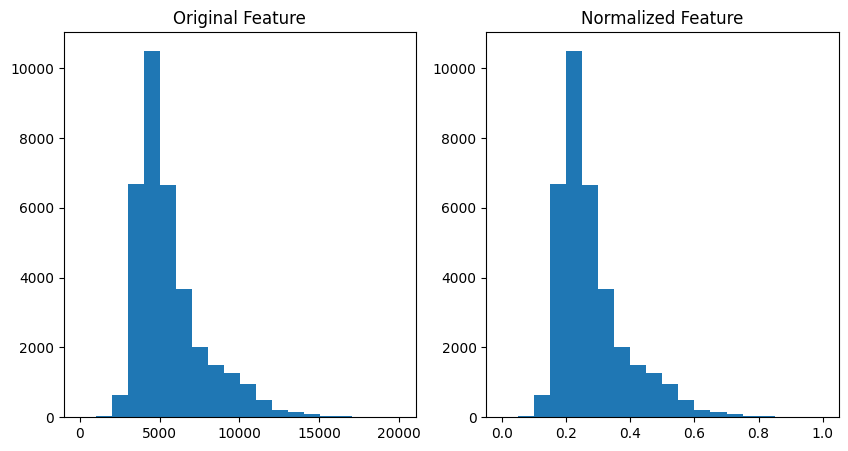

In [14]:
# this is an example

# feature_to_normalize = df['generation_fossil_gas']


# scaler = MinMaxScaler()


# normalized_feature = scaler.fit_transform(feature_to_normalize.values.reshape(-1,1))


# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].hist(feature_to_normalize, bins=20)
# ax[0].set_title('Original Feature')
# ax[1].hist(normalized_feature, bins=20)
# ax[1].set_title('Normalized Feature')
# plt.show()

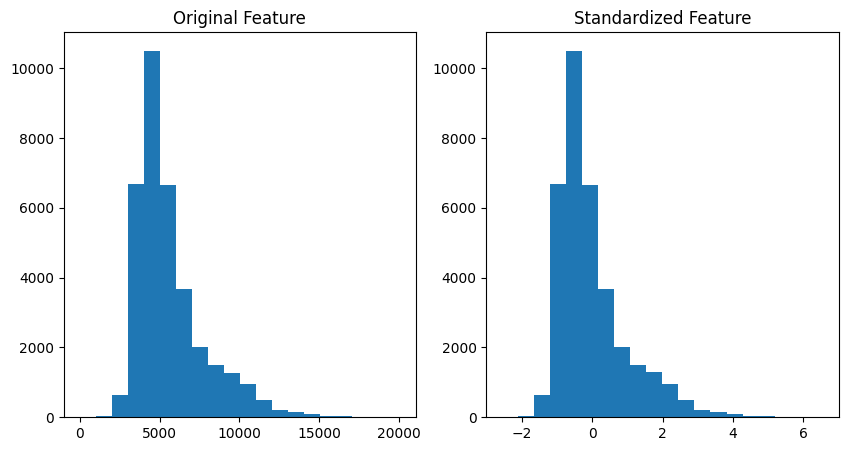

In [15]:

# feature_to_standardize = df['generation_fossil_gas']


# scaler = StandardScaler()


# standardized_feature = scaler.fit_transform(feature_to_standardize.values.reshape(-1,1))


# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].hist(feature_to_standardize, bins=20)
# ax[0].set_title('Original Feature')
# ax[1].hist(standardized_feature, bins=20)
# ax[1].set_title('Standardized Feature')
# plt.show()